In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [2]:
#!pip install opencv-python


In [3]:
#!pip install Pillow


In [7]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"D:\Niruppa\Working\DEEP LEARNING\cnn -image\TRAINING\HAPPY\capture.png")


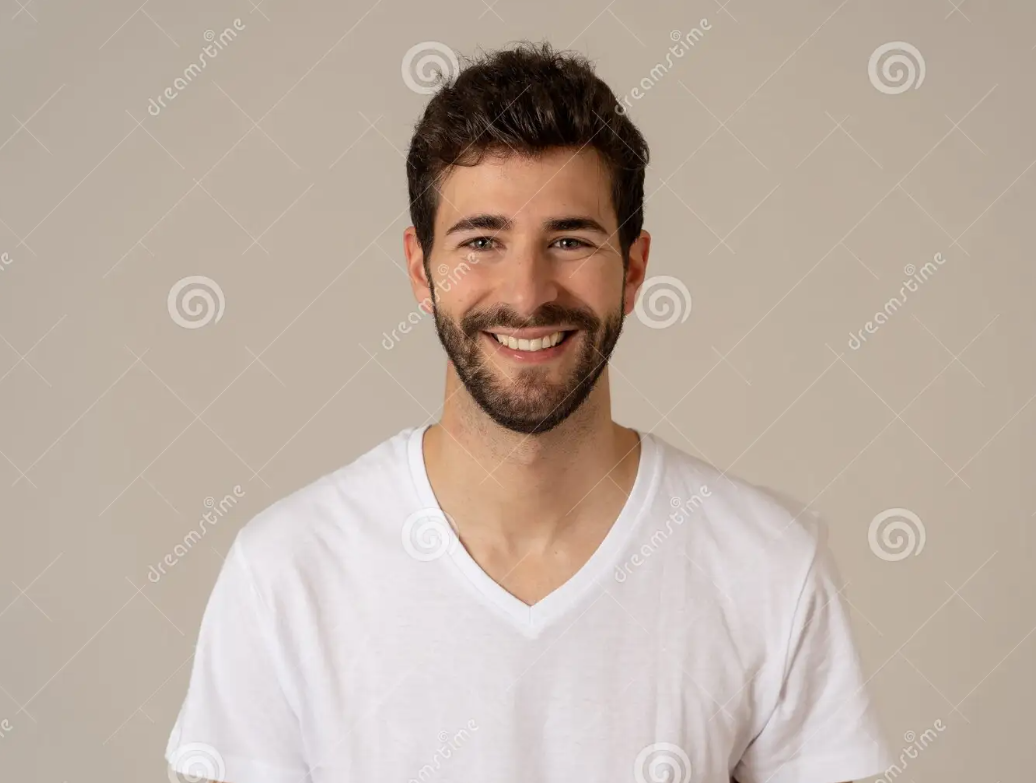

In [8]:
img

In [11]:
cv2.imread(r"D:\Niruppa\Working\DEEP LEARNING\cnn -image\TRAINING\HAPPY\capture.png").shape

(783, 1036, 3)

In [12]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [14]:
train_dataset = train.flow_from_directory(
    r"D:/Niruppa/Working/DEEP LEARNING/cnn -image/TRAINING",
    target_size=(200, 200),
    batch_size=2,
    class_mode='binary'
)

validation_dataset = validation.flow_from_directory(
    r"D:/Niruppa/Working/DEEP LEARNING/cnn -image/TRAINING",
    target_size=(200, 200),
    batch_size=2,
    class_mode='binary'
)


Found 12 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [15]:
train_dataset.class_indices

{'HAPPY': 0, 'SAD': 1}

In [16]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [18]:
import keras
from keras.layers import Dense,Activation,Dropout
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras import layers
from keras.utils.np_utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV

In [19]:
# Step 6: Define the CNN model
model = keras.models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),  # 1st conv layer
    layers.MaxPooling2D((2, 2)),                                           # 1st pooling layer

    layers.Conv2D(32, (3, 3), activation='relu'),                          # 2nd conv layer
    layers.MaxPooling2D((2, 2)),                                           # 2nd pooling layer
    layers.Conv2D(32, (3, 3), activation='relu'),                          # 2nd conv layer
    layers.MaxPooling2D((2, 2)),   
    layers.Flatten(),                                                      # flatten to 1D
    layers.Dense(400, activation='relu'),                                  # hidden layer
    layers.Dense(1, activation='sigmoid')                                 # output layer
])


In [22]:
# Step 7: Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [23]:
# Step 8: Train the model
history = model.fit(train_dataset,steps_per_epoch = 3, epochs=10, validation_data= validation_dataset)


Epoch 1/10
3/3 [==============================] - 1s 369ms/step - loss: 1.2341 - accuracy: 0.6667 - val_loss: 1.7210 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 1s 210ms/step - loss: 0.9297 - accuracy: 0.8333 - val_loss: 0.6567 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 1s 223ms/step - loss: 0.6098 - accuracy: 0.6667 - val_loss: 0.6509 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 1s 201ms/step - loss: 0.5573 - accuracy: 0.6667 - val_loss: 0.6057 - val_accuracy: 0.5833
Epoch 5/10
3/3 [==============================] - 1s 199ms/step - loss: 0.6403 - accuracy: 0.6667 - val_loss: 0.4830 - val_accuracy: 0.8333
Epoch 6/10
3/3 [==============================] - 1s 222ms/step - loss: 0.3454 - accuracy: 0.8333 - val_loss: 0.4106 - val_accuracy: 0.6667
Epoch 7/10
3/3 [==============================] - 1s 204ms/step - loss: 0.3167 - accuracy: 1.0000 - val_loss: 0.2596 - val_accuracy: 1.0000
Epoch 8/10
3/3 [====

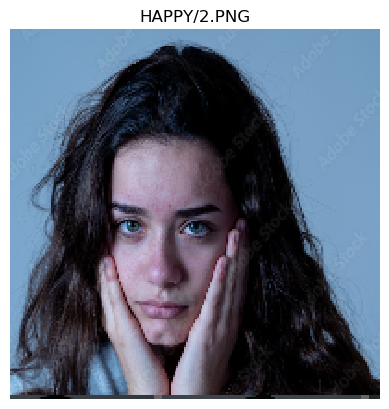

You are happy 😊


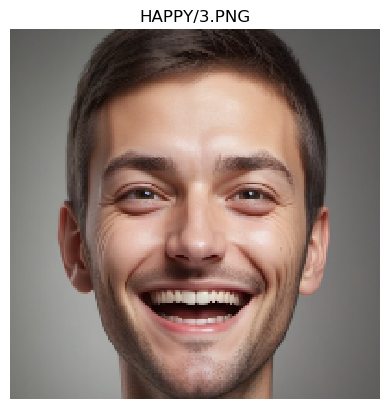

You are not happy 😞


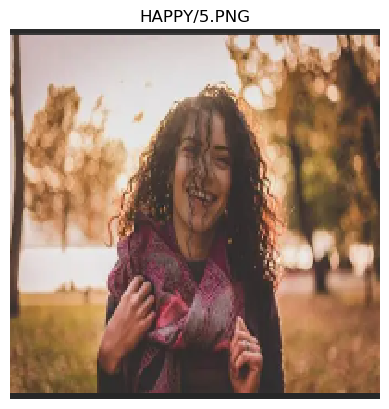

You are not happy 😞


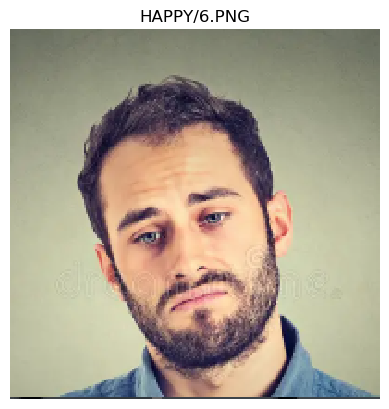

You are not happy 😞


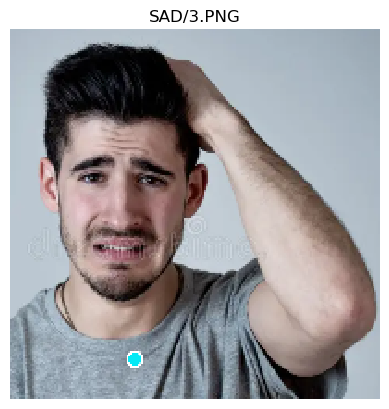

You are not happy 😞


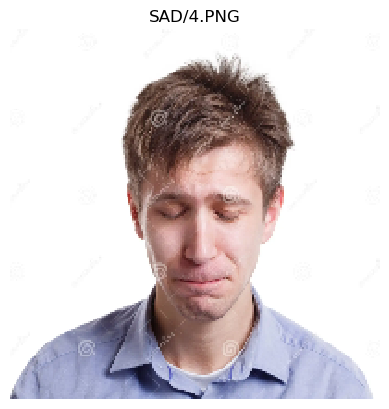

You are not happy 😞


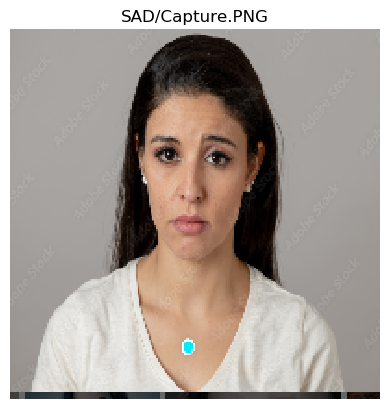

You are not happy 😞


In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

dir_path = r"D:/Niruppa/Working/DEEP LEARNING/cnn -image/TESTING"
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')

for subfolder in os.listdir(dir_path):
    subfolder_path = os.path.join(dir_path, subfolder)

    if not os.path.isdir(subfolder_path):
        continue  # skip if it's not a folder

    for file in os.listdir(subfolder_path):
        if file.lower().endswith(image_extensions):
            file_path = os.path.join(subfolder_path, file)

            try:
                # Load and show the image
                img = image.load_img(file_path, target_size=(200, 200))
                plt.imshow(img)
                plt.axis('off')
                plt.title(f"{subfolder}/{file}")
                plt.show()

                # Preprocess and predict
                X = image.img_to_array(img)
                X = np.expand_dims(X, axis=0)
                images = np.vstack([X])
                val = model.predict(images)

                if val < 0.5:
                    print("You are not happy 😞")
                else:
                    print("You are happy 😊")

            except Exception as e:
                print(f"Could not load image {file_path}. Error: {e}")
